In [14]:
import os, sys
from pprint import pprint
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('C:/Program Files/ASAP 2.1/bin')
import multiresolutionimageinterface as mir

# from scipy.ndimage import median_filter
# from skimage.transform import resize

print(os.getcwd())
# pprint(sys.path)

z:\src\Tutorials\Pathology


### Directories

In [2]:
data_root   = 'datasets/'
wsi_path    = data_root + 'test_001.tif'
xml_path    = data_root + 'test_001.xml'
mask_path   = data_root + 'test_001_mask.tif'

### Read Image

WSI: datasets/test_001.tif
> Dimensions: (86016, 89600)
> MPP: 0.2263209968805313 0.22631600499153137
> Magnification power of the objective: 
Tile:
> type <class 'numpy.ndarray'> 
> dtype: uint8 
> shape: (1400, 1344, 3)


(<Figure size 2000x1000 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1ecd2c3d7f0>)

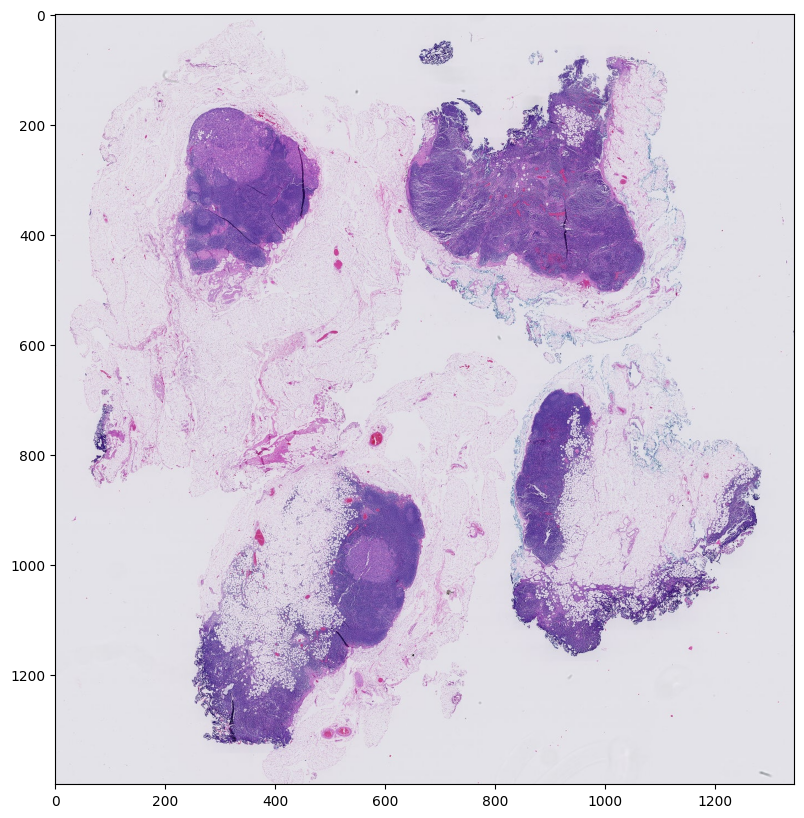

In [11]:
reader = mir.MultiResolutionImageReader()
image = reader.open(wsi_path)
spacing = image.getSpacing()

print("WSI:", wsi_path)
print("> Dimensions:", image.getDimensions())
print("> MPP:", *spacing)
print("> Magnification power of the objective:" , image.getProperty('openslide.objective-power'))

level = 6
dims = image.getLevelDimensions(level)
tile = image.getUCharPatch(0,0, dims[0], dims[1], level)
print("Tile:")
print("> type", type(tile), "\n> dtype:", tile.dtype, "\n> shape:", tile.shape)
plt.figure(figsize=(20,10)), plt.imshow(tile)

### Load Annotations

In [9]:
annotation_list = mir.AnnotationList()
xml_repository = mir.XmlRepository(annotation_list)
xml_repository.setSource(xml_path)
xml_repository.load()

# Get the first annotation
groups = annotation_list.getGroups()
print("Number of groups:", len(groups))
print("Group[0]")
print("- Name:", groups[0].getName())
print("- Color:", groups[0].getColor())

# Access the first annotation (index 0)
annotation = annotation_list.getAnnotation(0)
print("Annotation(0)")
print("- PartOfGroup:", annotation.getGroup().getName())
print("- Name:", annotation.getName())
print("- Type:", annotation.getType(), annotation.getTypeAsString())
# 0: NONE 1: POLYGON 2: SPLINE 3: SPLINE 4: POINTSET 5: MEASUREMENT 6: RECTANGLE
print("- Number of Points:", annotation.getNumberOfPoints())
print("- Coordinates(0)", annotation.getCoordinate(0).getX())
print("- BoundingBox:")
print(f"  ({annotation.getImageBoundingBox()[0].getX()}, {annotation.getImageBoundingBox()[0].getY()})")
print(f"  ({annotation.getImageBoundingBox()[1].getX()}, {annotation.getImageBoundingBox()[1].getY()})")
print("- Area:", annotation.getArea())
print(f"- Center: {annotation.getCenter().getX(), annotation.getCenter().getY()}")

Number of groups: 1
Group[0]
- Name: Tumor
- Color: #00aa00
Annotation(0)
- PartOfGroup: Tumor
- Name: Annotation 0
- Type: 2 Polygon
- Number of Points: 1033
- Coordinates(0) 36904.30078125
- BoundingBox:
  (33646.1015625, 60604.6015625)
  (39707.8984375, 66187.8984375)
- Area: 22879228.0
- Center: (36677.0, 63396.25)


### Convert Aannotations to Mask

In [8]:
label_map = {'Tumor':1}
annotation_mask = mir.AnnotationToMask()
annotation_mask.convert(annotation_list, mask_path,
                        image.getDimensions(), image.getSpacing(),
                        label_map)


# label_map = {'Tumor':1, 'Vessel':2, 'Normal':3}
# conversion_order = ['Vessel', 'Normal', 'Tumor']
# annotation_mask = mir.AnnotationToMask()
# annotation_mask.convert(annotation_list, mask_path,
#                         image.getDimensions(), image.getSpacing(),
#                         label_map, conversion_order)

Total time was 105874
Total reading time was 0
Total base writing time was 29613
Total pyramid downsampling time was 0
Total pyramid writing time was 76261
Total time determining min/max was 11


(<Figure size 2000x1000 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1ecd3f4fd60>)

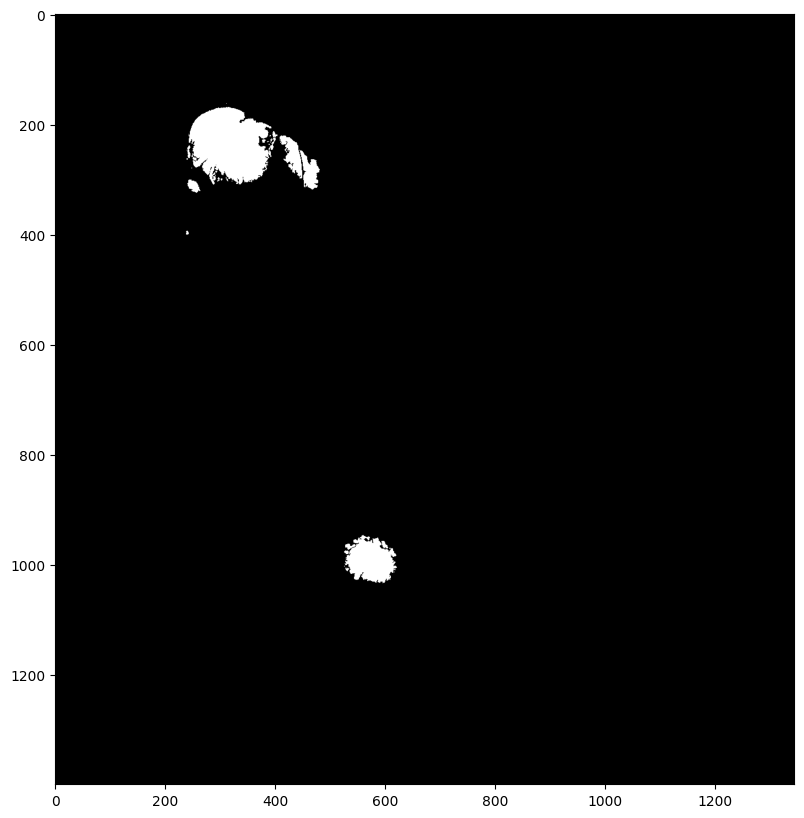

In [10]:
mask_reader = mir.MultiResolutionImageReader()
mask = mask_reader.open(mask_path)

level = 6
mask_dims = mask.getLevelDimensions(level)
mask_tile = mask.getUCharPatch(0,0, mask_dims[0], mask_dims[1], level)
plt.figure(figsize=(20,10)), plt.imshow(mask_tile, cmap='gray')

### Overlay

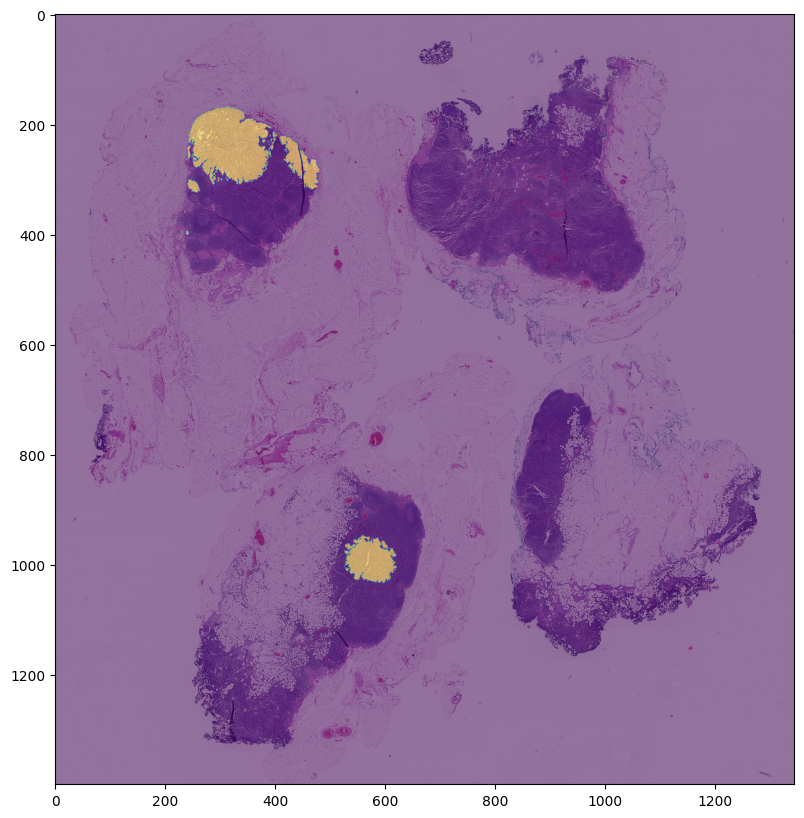

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(tile)
plt.imshow(mask_tile, alpha=0.5)